<h1 align='center' style="color: blue;">Image Recognition </h1>

 Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. 

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [4]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [5]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

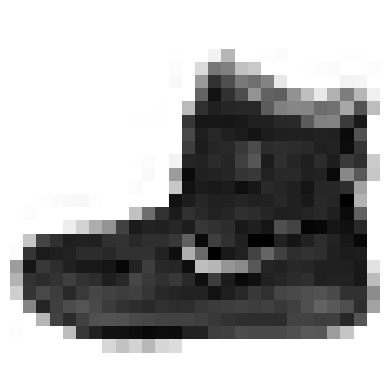

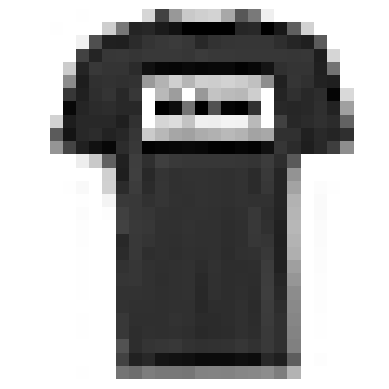

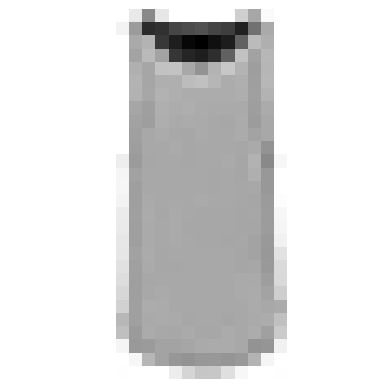

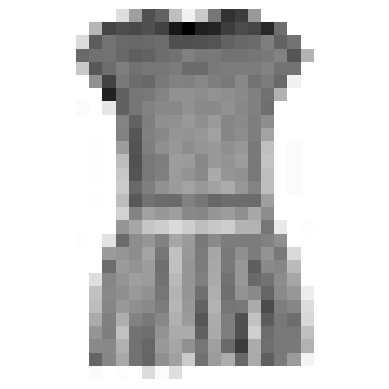

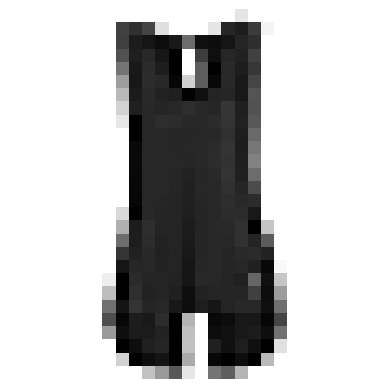

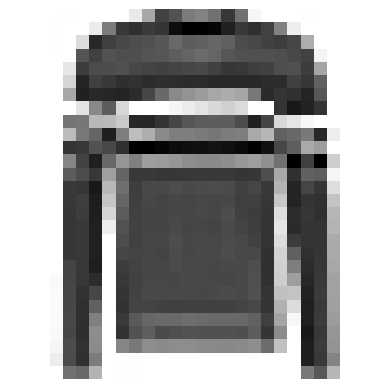

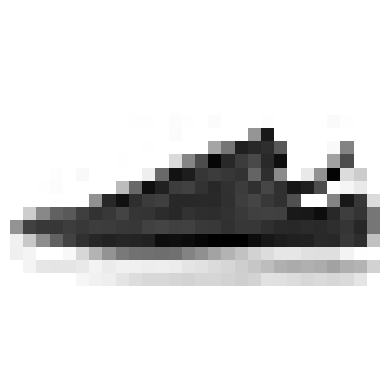

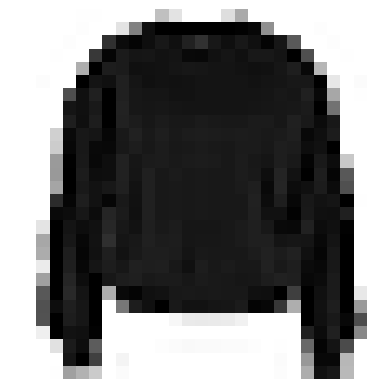

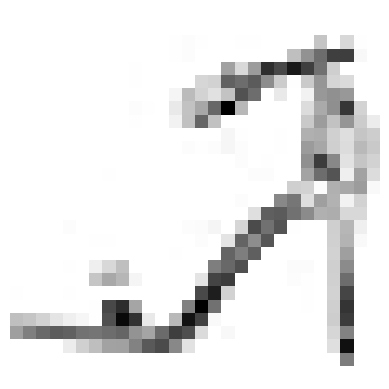

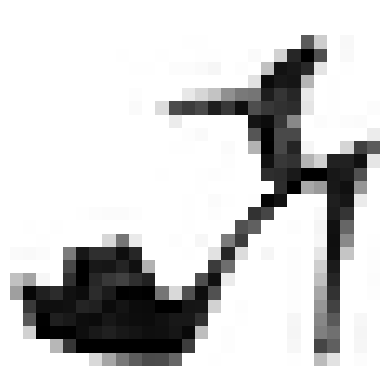

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in range(10):
    sample_image = X_train[i]
    plt.imshow(sample_image, cmap='binary')
    plt.axis('off')
    plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [7]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [8]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


### Task1

In [9]:
### importing warning module to ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
# check number of values for each class
import pandas as pd
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
### changing train data into 2d array

## 28x28 image will be converted into 1D array 784 pixels of train and test data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

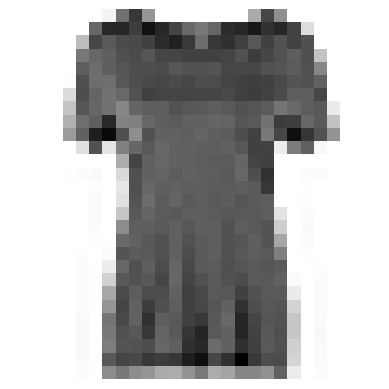

In [13]:
# visualizing the changed shape data
plt.imshow(X_train[10].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()
# and we see that the output is same

In [14]:
## using logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, auc
from sklearn.model_selection import cross_val_score
### training and testing model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
## cross validation score and mean accuracy for in data
accuracy_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
## accuracy and classification report of out data
pred1 = logreg_model.predict(X_test)
acc1 = accuracy_score(y_test, pred1, normalize = True)*100
print("\n Accuracy of Logistic for out data --> ", acc1)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred1))
print("----------------------------------------------------")
print("\n AUC of Logistic --> ", auc(y_test, pred1))

Cross Validation Scores for Log Reg: [0.854      0.84816667 0.85633333 0.8535     0.84958333]
Mean Accuracy Score for Log Reg: 0.8523166666666666

 Accuracy of Logistic for out data -->  84.11999999999999
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84     

    Logistic Regression mean accuracy is around 85% for train data while for test data it is around 84%. The model is working moderately fine for both train and test data. Precision and recall is not too less. 

In [9]:
### using Naive Bayes model
from sklearn.naive_bayes import GaussianNB 
# training and testing model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
## cross validation score and mean accuracy for in data
accuracy_nb = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for Naive Bayes: {}".format(accuracy_nb))
print("Mean Accuracy Score for Naive Bayes: {}".format(np.mean(accuracy_nb)))
# evaluating model using various metrices for out data
pred2 = nb_model.predict(X_test)
acc2 = accuracy_score(y_test, pred2, normalize = True)*100
print("\n Accuracy of Naive Bayes --> ", acc2)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred2))
print("----------------------------------------------------")
print("\n AUC of Naive Bayes --> ", auc(y_test, pred2))

Cross Validation Scores for Naive Bayes: [0.60241667 0.61208333 0.56825    0.58216667 0.58483333]
Mean Accuracy Score for Naive Bayes: 0.58995

 Accuracy of Naive Bayes -->  58.56
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000

--------

      Naive Bayes mean accuracy is around 59% for train data as well as same for test data.The model is not working fine for both train or test data. Precision and recall is also less.  

In [10]:
## using KNN model with 3 neighbours 
from sklearn.neighbors import KNeighborsClassifier
# training model
knn3_model = KNeighborsClassifier(n_neighbors=3)
knn3_model.fit(X_train, y_train)
## cross validation score and mean accuracy for in data
accuracy_knn3 = cross_val_score(knn3_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for KNN with 3 neighbours: {}".format(accuracy_knn3))
print("Mean Accuracy Score for KNN with 3 neighbours: {}".format(np.mean(accuracy_knn3)))
# evaluating model using various metrices for train data 
pred3 = knn3_model.predict(X_test)
acc3 = accuracy_score(y_test, pred3, normalize = True)*100
print("\n Accuracy of KNN with 3 neighbours --> ", acc3)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred3))
print("----------------------------------------------------")
print("\n AUC of KNN with 3 neighbours --> ", auc(y_test, pred3))

Cross Validation Scores for KNN with 3 neighbours: [0.85608333 0.84775    0.85041667 0.85591667 0.85233333]
Mean Accuracy Score for KNN with 3 neighbours: 0.8525

 Accuracy of KNN with 3 neighbours -->  85.41
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.98      0.97      0.98      1000
           2       0.72      0.81      0.76      1000
           3       0.91      0.85      0.88      1000
           4       0.80      0.74      0.77      1000
           5       0.99      0.83      0.91      1000
           6       0.65      0.59      0.62      1000
           7       0.89      0.95      0.92      1000
           8       0.98      0.95      0.97      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85 

        KNN with 3 neighbours mean accuracy is around 85% for train data same as for test data which is around 85%. The model is working moderately fine for both train and test data. Precision and recall is best for most of the classes.

In [8]:
## using KNN model with 5 neighbours 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, auc
from sklearn.model_selection import cross_val_score
# training model
knn5_model = KNeighborsClassifier(n_neighbors=5)
knn5_model.fit(X_train, y_train)
## cross validation score and mean accuracy for in data
accuracy_knn5 = cross_val_score(knn5_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for KNN with 5 neighbours: {}".format(accuracy_knn5))
print("Mean Accuracy Score for KNN with 5 neighbours: {}".format(np.mean(accuracy_knn5)))
pred4 = knn5_model.predict(X_test)
# evaluating model using various metrices
acc4 = accuracy_score(y_test, pred4, normalize = True)*100
print("\n Accuracy of KNN with 5 neighbours --> ", acc4)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred4))
print("----------------------------------------------------")
print("\n AUC of KNN with 5 neighbours --> ", auc(y_test, pred4))

Cross Validation Scores for KNN with 5 neighbours: [0.85741667 0.84875    0.85358333 0.85875    0.8515    ]
Mean Accuracy Score for KNN with 5 neighbours: 0.8540000000000001

 Accuracy of KNN with 5 neighbours -->  85.54
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.8

    KNN with 5 neighbours mean accuracy is around 85% for train data same as for test data which is around 85%. The model is working moderately fine for both train and test data. Precision and recall is best for most of the classes.

In [12]:
## using KNN model with 7 neighbours 
from sklearn.neighbors import KNeighborsClassifier
# training model
knn7_model = KNeighborsClassifier(n_neighbors=7)
knn7_model.fit(X_train, y_train)
## cross validation score and mean accuracy for in data
accuracy_knn7 = cross_val_score(knn7_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for KNN with 7 neighbours: {}".format(accuracy_knn7))
print("Mean Accuracy Score for KNN with 7 neighbours: {}".format(np.mean(accuracy_knn7)))
pred5 = knn7_model.predict(X_test)
# evaluating model using various metrices
acc5 = accuracy_score(y_test, pred5, normalize = True)*100
print("\n Accuracy of KNN with 7 neighbours --> ", acc5)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred5))
print("----------------------------------------------------")
print("\n AUC of KNN with 7 neighbours --> ", auc(y_test, pred5))

Cross Validation Scores for KNN with 7 neighbours: [0.85708333 0.84716667 0.85383333 0.85691667 0.85441667]
Mean Accuracy Score for KNN with 7 neighbours: 0.8538833333333333

 Accuracy of KNN with 7 neighbours -->  85.39999999999999
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.65      0.59      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted a

    KNN with 7 neighbours mean accuracy is around 85% for train data same as for test data which is around 85%. The model is working moderately fine for both train and test data. Precision and recall is best for most of the classes.
    
    As we can see there is not much difference in changing the neighbours, accuracy is more or less is same.

In [9]:
## using SGDClassifier Model
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
pred6 = sgd_model.predict(X_test)
## cross validation score and mean accuracy for in data
accuracy_sgd = cross_val_score(sgd_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for SGD: {}".format(accuracy_sgd))
print("Mean Accuracy Score for SGD: {}".format(np.mean(accuracy_sgd)))
# evaluating model using various metrices for out data
acc6 = accuracy_score(y_test[:100], pred6, normalize = True)*100
print("\n Accuracy of SGD Classifier --> ", acc6)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred6))
print("----------------------------------------------------")
print("\n AUC of SGD Classifier --> ", auc(y_test, pred6))

Cross Validation Scores for SGD: [0.8   0.765 0.8   0.75  0.77 ]
Mean Accuracy Score for SGD: 0.777

 Accuracy of SGD Classifier -->  75.0
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.93      1.00      0.96        13
           2       0.75      0.43      0.55        14
           3       0.80      0.44      0.57         9
           4       0.62      0.80      0.70        10
           5       0.86      0.67      0.75         9
           6       0.50      0.88      0.64         8
           7       0.62      0.73      0.67        11
           8       1.00      0.92      0.96        12
           9       0.67      0.67      0.67         6

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.74       100
weighted avg       0.78      0.75      0.74       100

-------------------------------------------------

    SGD mean accuracy is around 78% for train data same as for test data which is around 75%. This model accuracy is less than the KNN and logistics. Prediction and recall is also more except for 8 class

In [16]:
## using AdaBoostClassifier Model
from sklearn.ensemble import AdaBoostClassifier
# training and testing model
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
pred7 = model_ada.predict(X_test)
## cross validation score and mean accuracy for in data
accuracy_ada = cross_val_score(model_ada, X_train, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for ADA: {}".format(accuracy_ada))
print("Mean Accuracy Score for ADA: {}".format(np.mean(accuracy_ada)))
# evaluating model using various metrices
acc7 = accuracy_score(y_test, pred7, normalize = True)*100
print("\n Accuracy of ADA --> ", acc7)
print("---------------Classification Report----------------")
print(classification_report(y_test, pred7))
print("----------------------------------------------------")
print("\n AUC of ADA --> ", auc(y_test, pred7))

Cross Validation Scores for ADA: [0.53791667 0.4825     0.44408333 0.56766667 0.53391667]
Mean Accuracy Score for ADA: 0.5132166666666668

 Accuracy of ADA -->  54.25
---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.38      0.05      0.08      1000
           1       0.86      0.80      0.83      1000
           2       0.32      0.60      0.42      1000
           3       0.50      0.66      0.57      1000
           4       0.46      0.59      0.52      1000
           5       0.72      0.56      0.63      1000
           6       0.17      0.09      0.12      1000
           7       0.52      0.90      0.66      1000
           8       0.88      0.75      0.81      1000
           9       0.81      0.41      0.55      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.52     10000
weighted avg       0.56      0.54      0.52     10000

---------------------

    ADA mean accuracy is around 51% for train data same as for test data which is around 54%. This model accuracy is less than the KNN and logistics. This model works better for test data than for train data, that means it is underfit. 

    knn with 5 neighbours is working well than other model, its precision, recall and accuracy are greater than others

### Task 2

(97, 87, 4)


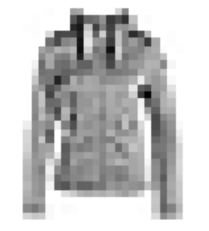

(159, 160, 4)


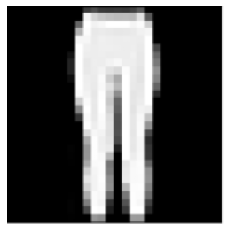

(157, 162, 4)


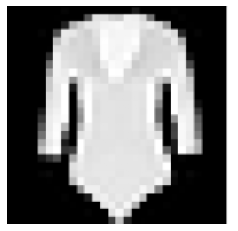

(160, 160, 4)


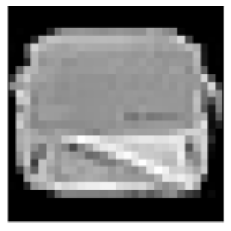

(157, 162, 4)


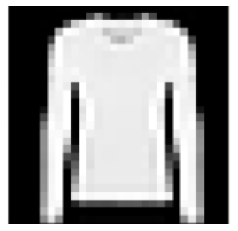

In [102]:
# plotting 5 images
images = ['i7.png','i8.png', 'i9.png', 'i10.png', 'i11.png']
for i in images:
    img = plt.imread(i)
    print(img.shape)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [98]:
### resizing images
import cv2
images = ['i7.png','i8.png', 'i9.png', 'i10.png', 'i11.png']
resize_images = []
for i in images:
    img = cv2.imread(i)
    new_img = cv2.resize(img, (28, 28))
    resize_images.append(new_img)
resize_images = np.array(resize_images)
print("SHAPE OF 5 RESIZE IMAGES --> ", resize_images.shape)

SHAPE OF 5 RESIZE IMAGES -->  (5, 28, 28, 3)


In [99]:
### grayscaling images
grayscale_images = []
for i in resize_images:
    img = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(img.flatten())
grayscale_images = np.array(grayscale_images)
print("SHAPE OF 5 GRAYSCALE IMAGES --> ", grayscale_images.shape)

SHAPE OF 5 GRAYSCALE IMAGES -->  (5, 784)


In [104]:
## definining actual classes
actual = [4, 1, 0, 8, 2]

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

In [108]:
### using best model which is knn model with 5 neighbours named as model4
pred = knn5_model.predict(grayscale_images)
# checking the accuracy of actual and predict
acc = accuracy_score(actual, pred)*100
print("-------ACCURACY---------", acc)
# printing the actual names
for i in pred:
    print(class_names[i])

-------ACCURACY--------- 80.0
Bag
Trouser
T-shirt/top
Bag
Pullover
